# Auto Insurance in Sweden

In the following data <br>
X = number of claims <br>
Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden <br>
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance <br>
Dataset available at: https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html <br>
Additional resorces:
- https://rubikscode.net/2019/03/18/introduction-to-tensorflow-js-with-real-world-example/
- https://github.com/tensorflow/tfjs-data
- https://codelabs.developers.google.com/codelabs/tfjs-training-regression/index.html#0

## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_json('swedish.json')
df = df.fillna(0)
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [2]:
X = df['X'].values
X = np.array(X).reshape(-1, 1)
Y = pd.to_numeric(df['Y'].values)

## Linear Regression

In [3]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [4]:
predictions = lm.predict(X)
print(predictions)

[388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369   122.40919256 101.9262512   50.7188978  125.82301612
  67.7880156  200.92713444 108.75389832]


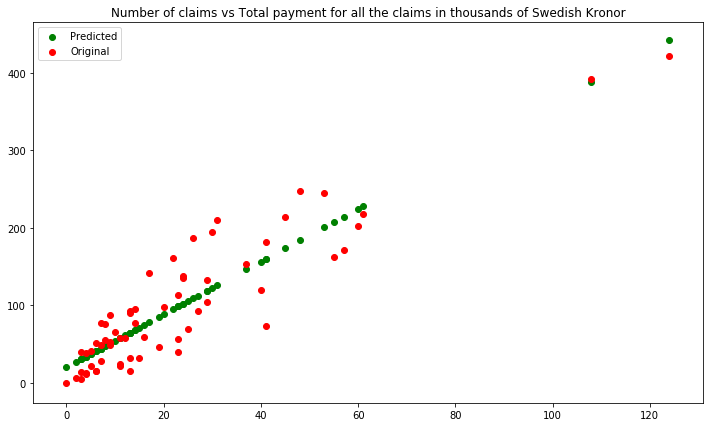

In [5]:
plt.figure(figsize=(12,7))
plt.title("Number of claims vs Total payment for all the claims in thousands of Swedish Kronor")
plt.scatter(X, predictions, color='green', marker='o', label='Predicted')
plt.scatter(X, Y, c='r', label='Original')
plt.legend()

In [10]:
# percentage of explained variance of the predictions
lm.score(X,Y)

0.8333466719794502

In [12]:
# coefficients for the predictions
lm.coef_

array([3.41382356])

In [13]:
# intercept for the predictors
lm.intercept_

19.994485759114795

## ARIMA

In [167]:
from statsmodels.tsa.arima_model import ARIMA

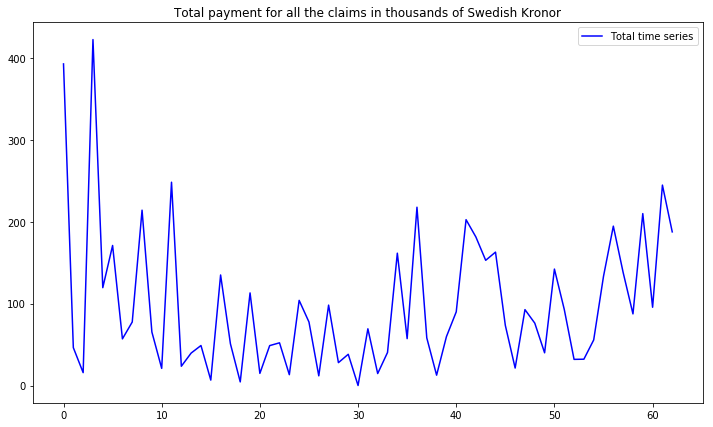

In [169]:
train_data, test_data = df['Y'][0:int(len(df)*0.80)], df['Y'][int(len(df)*0.80):]
plt.figure(figsize=(12,7))
plt.title("Total payment for all the claims in thousands of Swedish Kronor")
plt.plot(df['Y'][0:len(df)], 'blue', label='Total time series')
plt.legend()

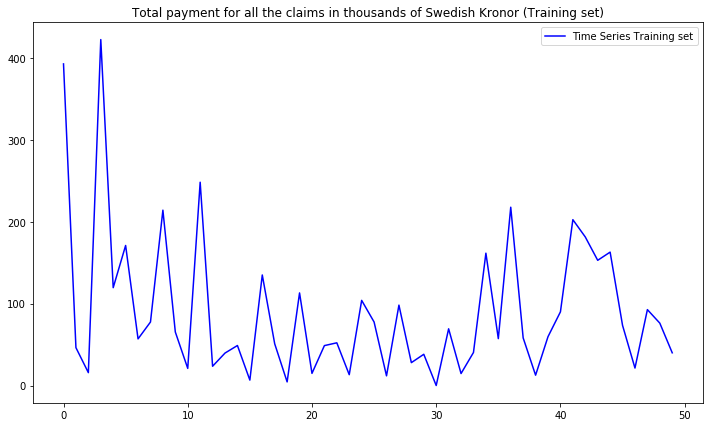

In [171]:
plt.figure(figsize=(12,7))
plt.title("Total payment for all the claims in thousands of Swedish Kronor (Training set)")
plt.plot(df['Y'][0:len(df)-len(df['Y'][int(len(df)*0.80):])], 'blue', label='Time Series Training set')
plt.legend()

In [158]:
train_ar = train_data.values
test_ar = test_data.values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(12,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)

<class 'list'>


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", 

In [96]:
error = mean_squared_error(test_ar, predictions)
predictions = np.array(predictions).ravel()
print(predictions)

[132.59381527  82.15254905 107.60878649  47.94427792 -34.17813622
  60.95066193  26.96751936   3.72970644  70.66549997  29.88878222
  41.02571469   6.06473355 -57.18399149]


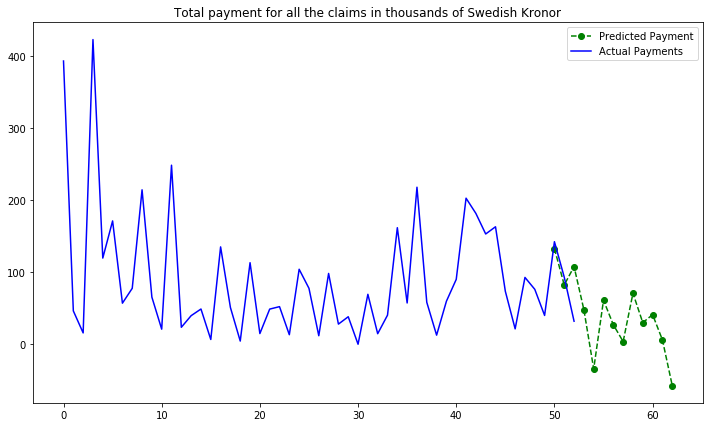

In [109]:
plt.figure(figsize=(12,7))
plt.title("Total payment for all the claims in thousands of Swedish Kronor")
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Payment')
plt.plot(df['Y'][0:len(df)-len(df['Y'][int(len(df)*0.85):])], 'blue', label='Actual Payments')
plt.legend()

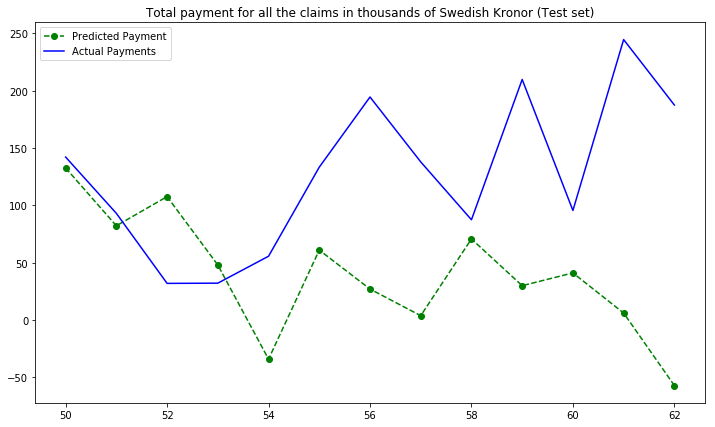

In [110]:
plt.figure(figsize=(12,7))
plt.title("Total payment for all the claims in thousands of Swedish Kronor (Test set)")
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Payment')
plt.plot(df['Y'][int(len(df)*0.80):], 'blue', label='Actual Payments')
plt.legend()